In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
# definir formato para salidas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# importar archivos de ganancia de la carpeta EV
dir = "data"

dfs=[]
nombre_archivo=[]
for filename in os.listdir(dir):
    if filename.endswith(".txt"): 
        file_path = os.path.join(dir, filename)
        df = pd.read_csv(file_path, delimiter="\t")
        dfs.append(df)
        nombre_archivo.append(filename)
nombre_archivo.pop()

'metricas_corridas_dr.txt'

In [8]:
nombre_archivo

['ev_01_ninguno_ganancias_01_063.txt',
 'ev_02_rank_simple_ganancias_01_030.txt',
 'ev_03_rank_cero_fijo_ganancias_01_068.txt',
 'ev_04_deflacion_ganancias_01_033.txt',
 'ev_05_estandarizar_ganancias_01_066.txt',
 'ev_07_uva_ganancias_01_030.txt',
 'ev_12_dol_blue_ganancias_01_040.txt',
 'ev_13_dol_mino_ganancias_01_054.txt']

In [9]:
# primer dataset EV1: Método 'Ninguno'
df0 = dfs[0]

# registros dataset
df0

envios     gan_sum_1         m_1_1         m_1_2         m_1_3  \
0            1      -3000.00      -3000.00      -3000.00      -3000.00   
1            2      -6000.00      -6000.00      -6000.00      -6000.00   
2            3      -9000.00      -9000.00      -9000.00      -9000.00   
3            4     -12000.00     -12000.00     -12000.00     -12000.00   
4            5     -15000.00     -15000.00     -15000.00     -15000.00   
...        ...           ...           ...           ...           ...   
164591  164592 -344016000.00 -344016000.00 -344016000.00 -344016000.00   
164592  164593 -344019000.00 -344019000.00 -344019000.00 -344019000.00   
164593  164594 -344022000.00 -344022000.00 -344022000.00 -344022000.00   
164594  164595 -344025000.00 -344025000.00 -344025000.00 -344025000.00   
164595  164596 -344028000.00 -344028000.00 -344028000.00 -344028000.00   

               m_1_4         m_1_5         m_1_6         m_1_7         m_1_8  \
0           -3000.00      -3000.00      -3000.00      -3000.00      -3000.00   
1           -6000.00      -6000.00      -6000.00      -6000.00      -6000.00   
2           -9000.00      -9000.00      -9000.00      -9000.00      -9000.00   
3          -12000.00     -12000.00     -12000.00     -12000.00     -12000.00   
4          -15000.00     -15000.00     -15000.00     -15000.00     -15000.00   
...              ...           ...           ...           ...           ...   
164591 -344016000.00 -344016000.00 -344016000.00 -344016000.00 -344016000.00   
164592 -344019000.00 -344019000.00 -344019000.00 -344019000.00 -344019000.00   
164593 -344022000.00 -344022000.00 -344022000.00 -344022000.00 -344022000.00   
164594 -344025000.00 -344025000.00 -344025000.00 -344025000.00 -344025000.00   
164595 -344028000.00 -344028000.00 -344028000.00 -344028000.00 -344028000.00   

               m_1_9        m_1_10  gan_suavizada  
0           -3000.00      -3000.00            NaN  
1           -6000.00      -6000.00            NaN  
2           -9000.00      -9000.00            NaN  
3          -12000.00     -12000.00            NaN  
4          -15000.00     -15000.00            NaN  
...              ...           ...            ...  
164591 -344016000.00 -344016000.00            NaN  
164592 -344019000.00 -344019000.00            NaN  
164593 -344022000.00 -344022000.00            NaN  
164594 -344025000.00 -344025000.00            NaN  
164595 -344028000.00 -344028000.00            NaN  

[164596 rows x 13 columns]

In [10]:
# metodos definidos
prefijos = ['Ninguno', 'Rank simple', 'Rank cero fijo', 'Deflación', 'Estandarizar', 'UVA', 'Dólar Blue', 'Dólar Oficial Minorista']

# campos ganancias para cada semilla
campos_m = ['m_1_1', 'm_1_2', 'm_1_3', 'm_1_4', 'm_1_5', 'm_1_6', 'm_1_7', 'm_1_8', 'm_1_9', 'm_1_10']

# ganancia media
df0['mean_campos_m'] = df0[campos_m].mean(axis=1)


In [11]:
# obtener las ganancias suavizadas para cada una de las semillas, por ej, para la primera
df0['gan_suavizada_m1_1'] = df0['m_1_1'].rolling(window=2001, center=True).mean()
df0.loc[df0['gan_suavizada_m1_1'].idxmax()]["gan_suavizada_m1_1"]


62142607.1964018

In [12]:
# obtener las ganancias suavizadas para cada una de las semillas, por ej, para la primera
df0['gan_suavizada_m1_2'] = df0['m_1_2'].rolling(window=2001, center=True).mean()
df0.loc[df0['gan_suavizada_m1_2'].idxmax()]["gan_suavizada_m1_2"]

62410191.90404797

In [13]:
# maximo valor de la ganancia media suavizada
df0.loc[df0['gan_suavizada'].idxmax()]["gan_suavizada"]

62017793.1034483

In [14]:
# LOG RESULTADOS EV1
# fecha	            rank	iteracion_bayesiana	qsemillas	semilla	        corte	ganancia	        metrica
# 20240711.042600	1	    63	                1	        912523	        10841	62142607.1964018	62142607.1964018
# 20240711.042604	1	    63	                1	        386641	        11242	62410191.904048	    62410191.904048
# 20240711.042606	1	    63	                1	        251737	        11887	61868595.2023988	61868595.2023988
# 20240711.042608	1	    63	                1	        914533	        10458	61729568.2158921	61729568.2158921
# 20240711.042611	1	    63	                1	        630523	        10178	61854185.9070465	61854185.9070465
# 20240711.042613	1	    63	                1	        402239	        11293	62042739.1304348	62042739.1304348
# 20240711.042616	1	    63	                1	        651913	        12388	61885235.3823088	61885235.3823088
# 20240711.042618	1	    63	                1	        552833	        10652	61893535.2323838	61893535.2323838
# 20240711.042620	1	    63	                1	        583937	        10547	63484457.2713643	63484457.2713643
# 20240711.042623	1	    63	                1	        116747	        11540	62002368.8155922	62002368.8155922
# 20240711.042625	1	    63	                10      	-1	            10916	62017793.1034483	62017793.1034483

In [15]:
# para cada uno de los métodos evaluados - gan_suavizada máxima
for i in range(0,8):
    print("Archivo:", nombre_archivo[i])
    print("Ganancia Maxima:", dfs[i].loc[dfs[i]['gan_suavizada'].idxmax()]["gan_suavizada"])
    print("\n")

Archivo: ev_01_ninguno_ganancias_01_063.txt
Ganancia Maxima: 62017793.1034483


Archivo: ev_02_rank_simple_ganancias_01_030.txt
Ganancia Maxima: 59571866.5667166


Archivo: ev_03_rank_cero_fijo_ganancias_01_068.txt
Ganancia Maxima: 60574128.9355322


Archivo: ev_04_deflacion_ganancias_01_033.txt
Ganancia Maxima: 60079880.05997


Archivo: ev_05_estandarizar_ganancias_01_066.txt
Ganancia Maxima: 57167149.9250375


Archivo: ev_07_uva_ganancias_01_030.txt
Ganancia Maxima: 60077853.0734633


Archivo: ev_12_dol_blue_ganancias_01_040.txt
Ganancia Maxima: 58011979.0104948


Archivo: ev_13_dol_mino_ganancias_01_054.txt
Ganancia Maxima: 61153317.8410795




## Test de Wilcox

In [16]:
from scipy.stats import wilcoxon
from itertools import combinations

In [17]:
metricas_corridas_dr = pd.read_csv("data/metricas_corridas_dr.txt", delimiter="\t")
metricas_corridas_dr.columns = ['semilla'] + prefijos
metricas_corridas_dr

semilla     Ninguno  Rank simple  Rank cero fijo   Deflación  Estandarizar  \
0   912523 62142607.20  59416017.99     60904620.69 59918728.64   57605668.67   
1   386641 62410191.90  59760185.91     60636782.61 60107596.70   57491242.88   
2   251737 61868595.20  59817371.81     60637295.35 59560833.58   57124658.17   
3   914533 61729568.22  60212061.47     60736941.53 60292583.21   58103887.56   
4   630523 61854185.91  59440737.63     61077980.51 60668452.77   56791223.39   
5   402239 62042739.13  59972239.88     60948044.98 59587238.38   57306916.04   
6   651913 61885235.38  60308662.67     60787386.81 62646050.97   57282983.51   
7   552833 61893535.23  59777716.64     61237776.61 59743958.02   57566866.57   
8   583937 63484457.27  59097935.53     61438263.87 59522916.04   56561953.52   
9   116747 62002368.82  59232316.34     60370727.14 59598184.41   57656251.87   

          UVA  Dólar Blue  Dólar Oficial Minorista  
0 60021728.64 57986278.86              61507166.42  
1 59923439.28 57372116.94              61662772.11  
2 61038794.60 58288157.42              60136003.00  
3 59523806.60 58841820.09              60522938.53  
4 59670122.94 58813575.71              61563905.55  
5 60582763.12 57063766.12              61213790.10  
6 60584413.79 58615034.48              60828947.53  
7 59972416.79 58394212.89              61869259.37  
8 60689835.08 58279527.74              61939068.97  
9 60624338.83 57948842.58              60763971.51

In [18]:
metricas_corridas_dr.mean()

semilla                     540362.60
Ninguno                   62131348.43
Rank simple               59703524.59
Rank cero fijo            60877582.01
Deflación                 60164654.27
Estandarizar              57349165.22
UVA                       60263165.97
Dólar Blue                58160333.28
Dólar Oficial Minorista   61200782.31
dtype: float64

In [19]:
# Perform the Wilcoxon signed-rank test
ganancias_semillas_metodo_ninguno = [62142607.1964018,62410191.904048,61868595.2023988,61729568.2158921,61854185.9070465,62042739.1304348,61885235.3823088,61893535.2323838,63484457.2713643,62002368.8155922,]
ganancias_semillas_metodo_rank_simple = [59416017.9910045,59760185.9070465,59817371.814093,60212061.4692654,59440737.6311844,59972239.88006,60308662.6686657,59777716.6416792,59097935.5322339,59232316.3418291,]

stat, p = wilcoxon(ganancias_semillas_metodo_ninguno, ganancias_semillas_metodo_rank_simple)

print(f"Wilcoxon test statistic: {stat}")
print(f"P-value: {p}")

Wilcoxon test statistic: 0.0
P-value: 0.001953125


In [20]:
# Lista de columnas a comparar
columns = metricas_corridas_dr.columns[1:]

# Crear todas las combinaciones de pares de columnas
column_pairs = combinations(columns, 2)

# Aplicar el test de Wilcoxon a cada par de columnas y mostrar los resultados
results = []

for col1, col2 in column_pairs:
    stat, p = wilcoxon(metricas_corridas_dr[col1], metricas_corridas_dr[col2])
    results.append((col1, col2, stat, p))

# Mostrar los resultados
for result in results:
    #print(f'Comparación entre {result[0]} y {result[1]}: Estadística = {result[2]}, p-valor = {result[3]}')
    print(f'Comparación entre {result[0]} y {result[1]}: p-value = {result[3]}')

Comparación entre Ninguno y Rank simple: p-value = 0.001953125
Comparación entre Ninguno y Rank cero fijo: p-value = 0.001953125
Comparación entre Ninguno y Deflación: p-value = 0.00390625
Comparación entre Ninguno y Estandarizar: p-value = 0.001953125
Comparación entre Ninguno y UVA: p-value = 0.001953125
Comparación entre Ninguno y Dólar Blue: p-value = 0.001953125
Comparación entre Ninguno y Dólar Oficial Minorista: p-value = 0.001953125
Comparación entre Rank simple y Rank cero fijo: p-value = 0.001953125
Comparación entre Rank simple y Deflación: p-value = 0.083984375
Comparación entre Rank simple y Estandarizar: p-value = 0.001953125
Comparación entre Rank simple y UVA: p-value = 0.037109375
Comparación entre Rank simple y Dólar Blue: p-value = 0.001953125
Comparación entre Rank simple y Dólar Oficial Minorista: p-value = 0.001953125
Comparación entre Rank cero fijo y Deflación: p-value = 0.064453125
Comparación entre Rank cero fijo y Estandarizar: p-value = 0.001953125
Comparaci

## Gráficos de ganancia para los métodos probados

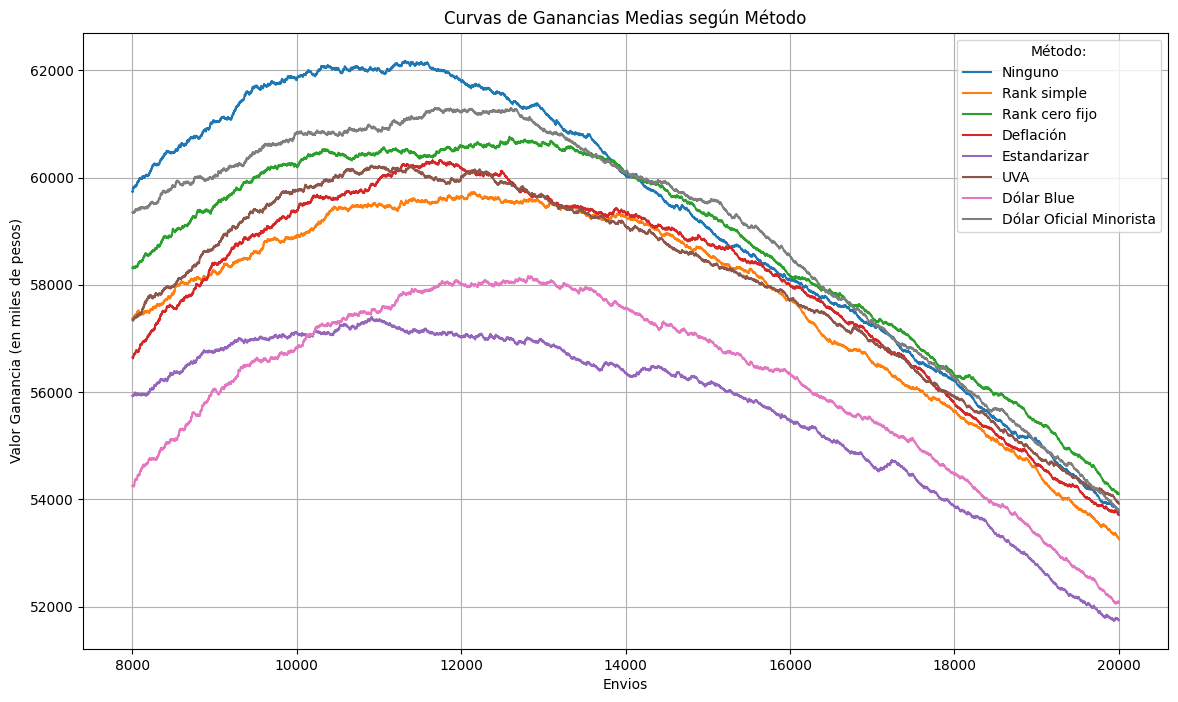

In [21]:
# Ganancias Medias

# Configura el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Grafica cada columna
for i in range(0,8):
    df = dfs[i]
    df = df[(df['envios']>8000) & (df['envios']<20000)]
    plt.plot(df['envios'], df["gan_sum_1"]/1000, label=prefijos[i])

# Agrega etiquetas y título
plt.xlabel('Envios')
plt.ylabel('Valor Ganancia (en miles de pesos)')
plt.title('Curvas de Ganancias Medias según Método')
plt.legend(title="Método:")
plt.grid(True)

# Muestra el gráfico
plt.show()

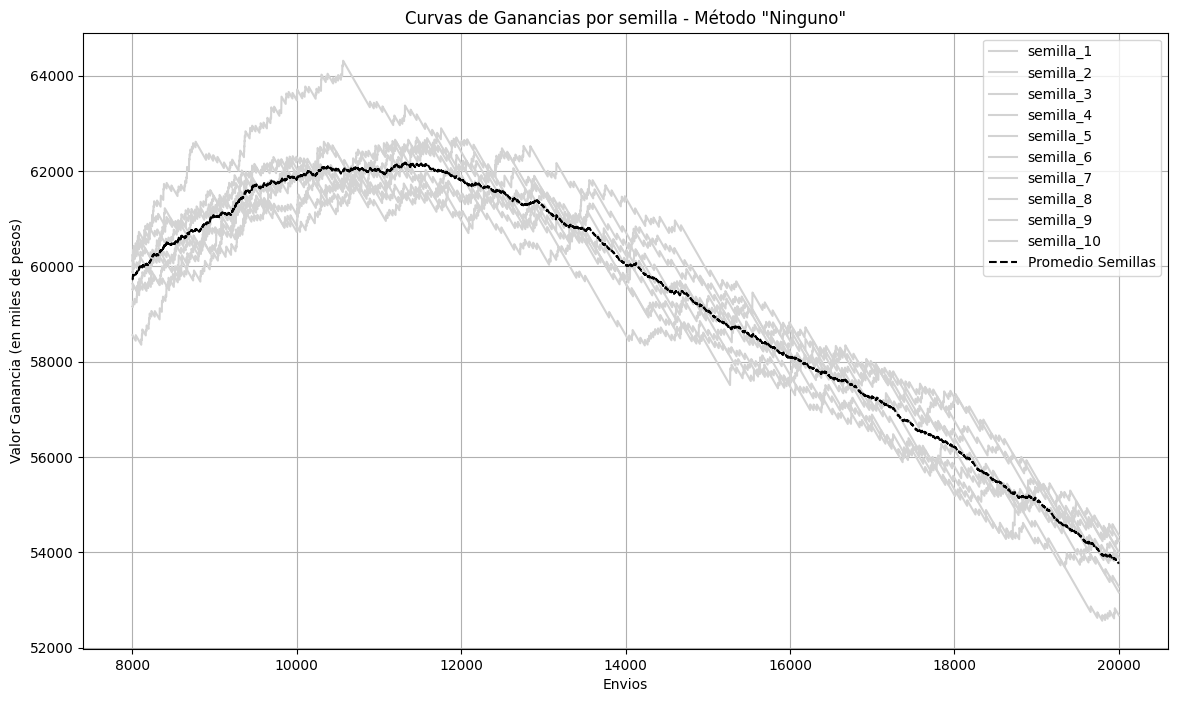

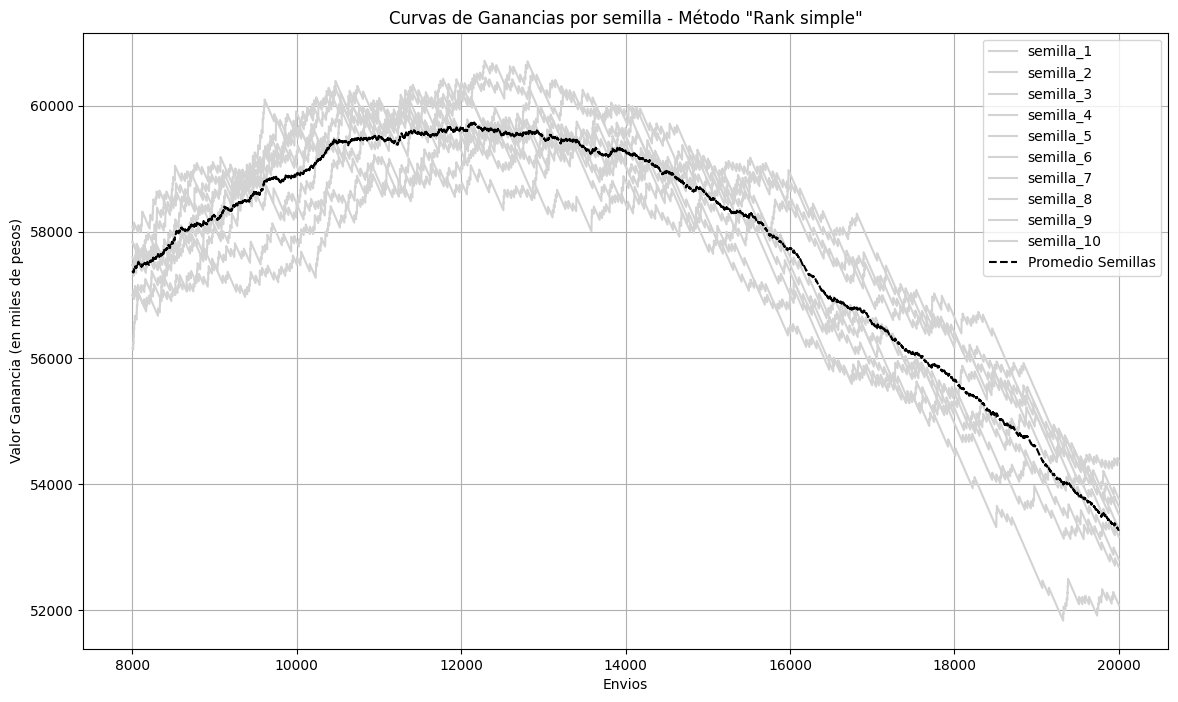

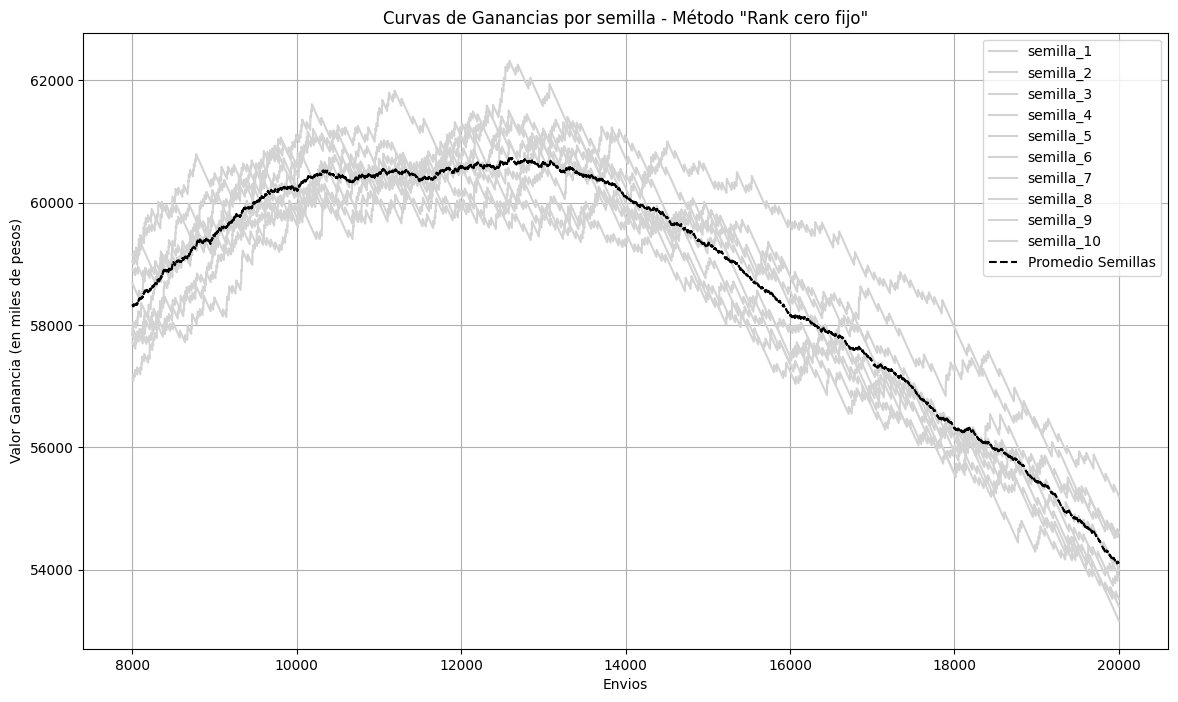

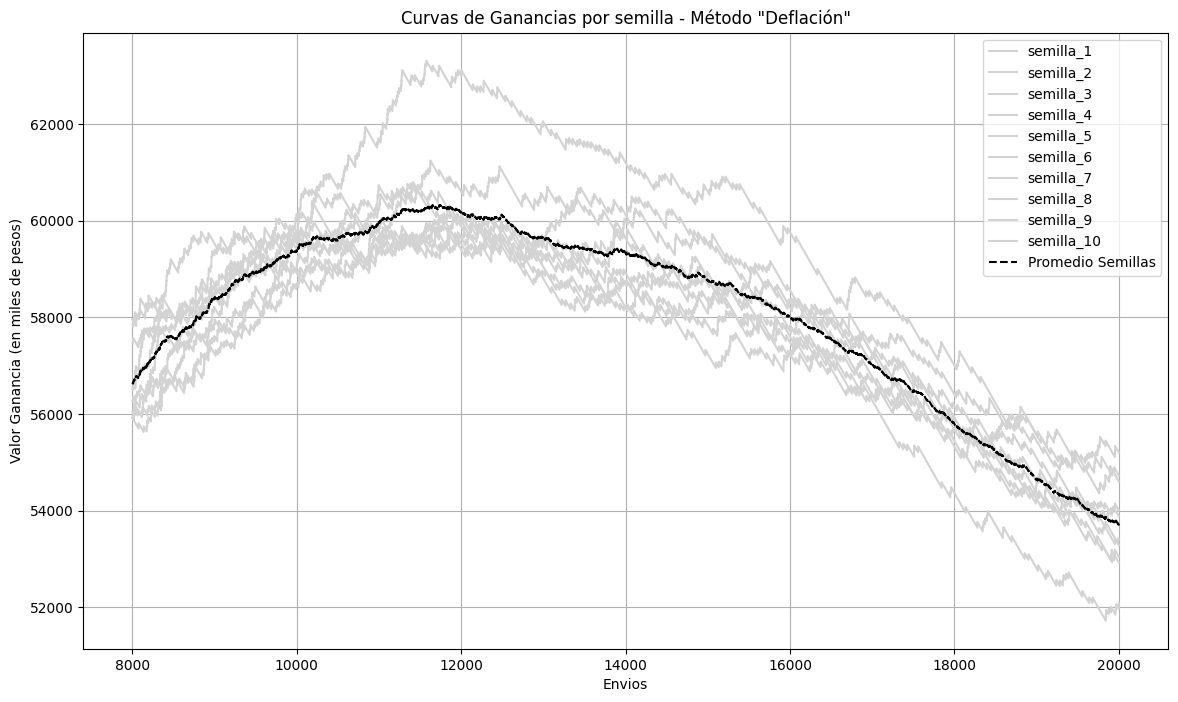

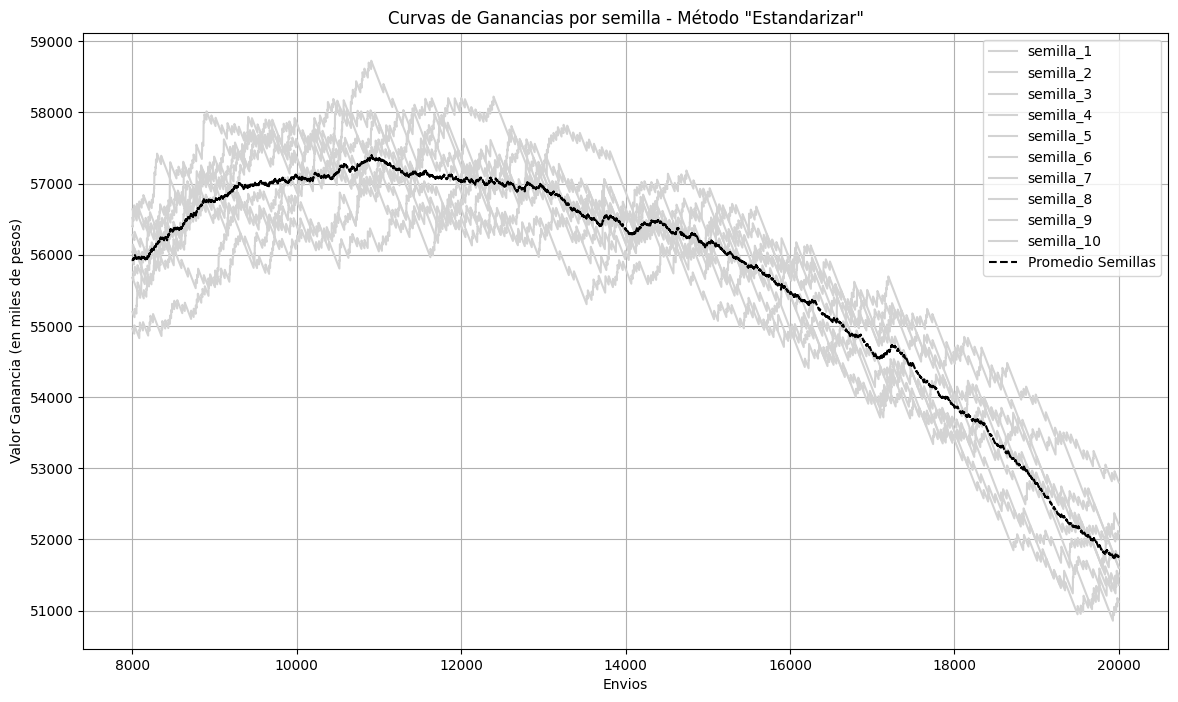

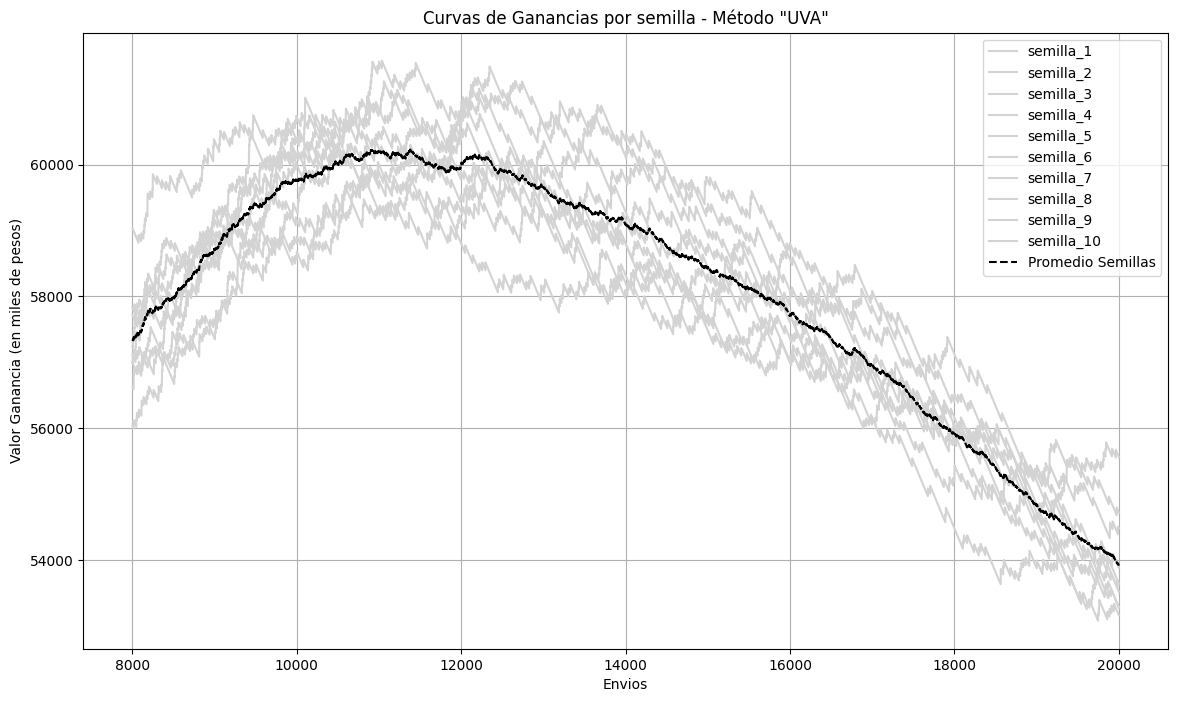

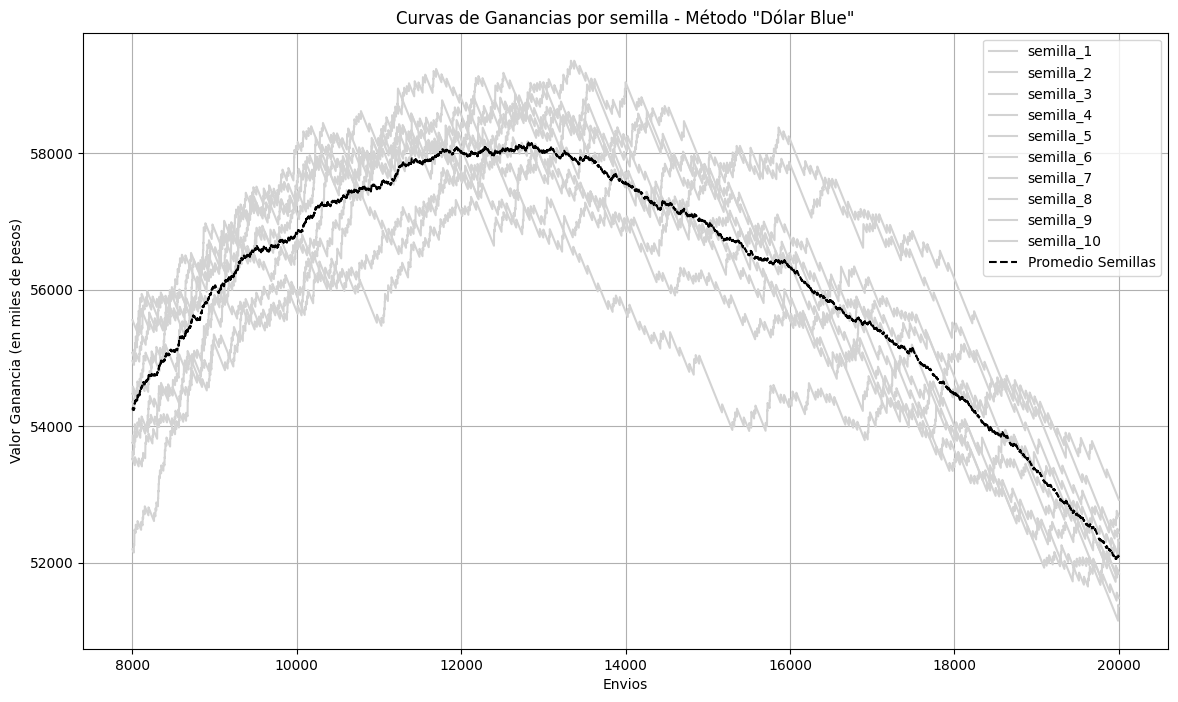

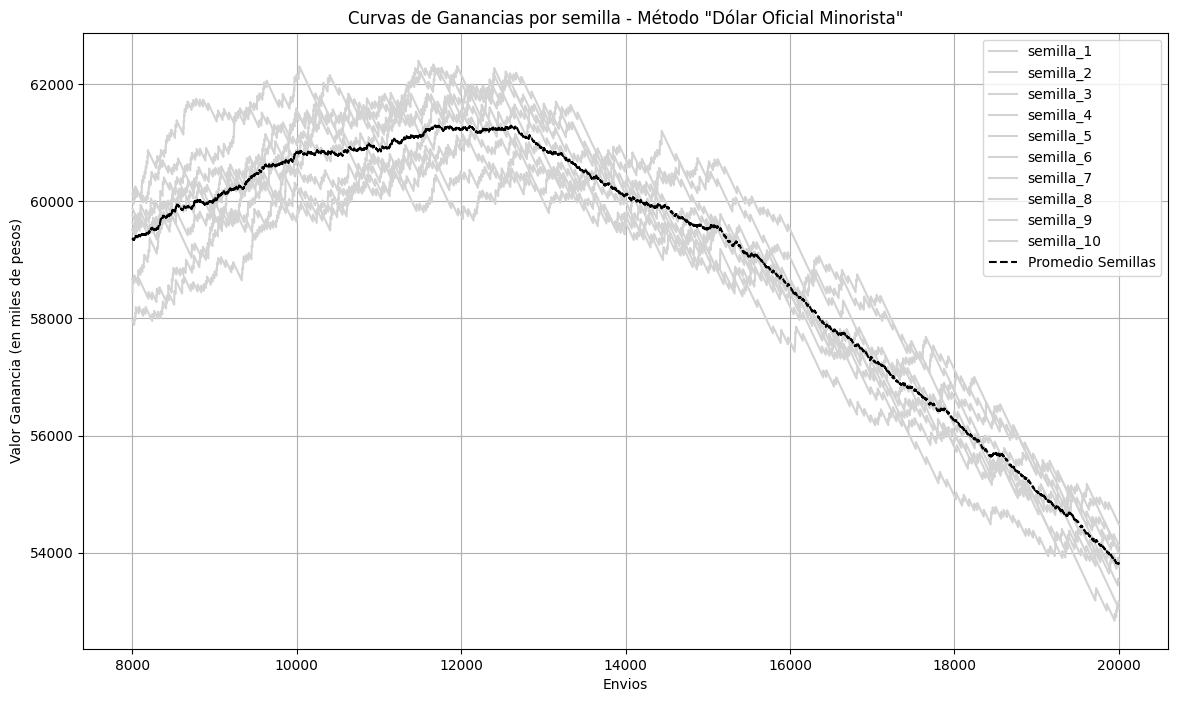

In [22]:
# Ganancias por semilla para cada uno de los métodos probados
for i in range(0,8):
    df = dfs[i]
    df = df[['envios', 'gan_sum_1', 'm_1_1', 'm_1_2', 'm_1_3', 'm_1_4', 'm_1_5',
            'm_1_6', 'm_1_7', 'm_1_8', 'm_1_9', 'm_1_10', 'gan_suavizada']]
    df = df[(df['envios']>8000) & (df['envios']<20000)]
    titulo = prefijos[i]

    # Selecciona las columnas que deseas graficar
    columnas_a_graficar = ['m_1_1', 'm_1_2', 'm_1_3', 'm_1_4', 'm_1_5', 'm_1_6', 'm_1_7', 'm_1_8', 'm_1_9', 'm_1_10']
    columnas_a_graficar_2 = ['semilla_1', 'semilla_2', 'semilla_3', 'semilla_4', 'semilla_5', 'semilla_6', 'semilla_7', 'semilla_8', 'semilla_9', 'semilla_10']

    # Configura el tamaño del gráfico
    plt.figure(figsize=(14, 8))

    # Grafica cada columna en gris claro
    for i, columna in enumerate(columnas_a_graficar):
        plt.plot(df['envios'], df[columna]/1000, label=columnas_a_graficar_2[i], color='lightgrey')

    # Calcula el promedio de los 10 valores por envío
    df['promedio'] = df[columnas_a_graficar].mean(axis=1)

    # Grafica la curva de promedio en negro
    plt.plot(df['envios'], df['promedio']/1000, label='Promedio Semillas', linestyle='--', color='black')

    # Agrega etiquetas y título
    plt.xlabel('Envios')
    plt.ylabel('Valor Ganancia (en miles de pesos)')
    plt.title(f'Curvas de Ganancias por semilla - Método "{titulo}"')
    plt.legend()
    plt.grid(True)

    # Muestra el gráfico
    plt.show()

In [25]:
# importo semilleros
df_ganancias_semillero_combinado = pd.read_csv("data\ganancias_semillero_dr.csv")

columnas_semillero = ['ganancia_acum_ninguno', 'ganancia_acum_rank_simple',
       'ganancia_acum_rank_cero_fijo', 'ganancia_acum_deflacion',
       'ganancia_acum_estandarizar', 'ganancia_acum_uva', 'ganancia_acum_dolar_blue', 'ganancia_acum_dolar_oficial_minorista']

labels_semillero = ['ensemble_ninguno', 'ensemble_rank_simple',
       'ensemble_rank_cero_fijo', 'ensemble_deflacion',
       'ensemble_estandarizar', 'ensemble_uva', 'ensemble_dolar_blue', 'ensemble_dolar_oficial_minorista']

df_ganancias_semillero_combinado.columns = ["envios"]+columnas_semillero

for col in columnas_semillero:
       df_ganancias_semillero_combinado[f"gan_suavizada_{col}"] = df_ganancias_semillero_combinado[col].rolling(window=2001, center=True).mean()

df_ganancias_semillero_combinado = df_ganancias_semillero_combinado[(df_ganancias_semillero_combinado['envios']>8000) & (df_ganancias_semillero_combinado['envios']<20000)]

In [26]:
# DESCONSIDERAR!
# # Ganancias por semilla para cada uno de los métodos probados
# for i in range(0,6):
#     # Selecciona las columnas que deseas graficar
#     columnas_a_graficar = ['m_1_1', 'm_1_2', 'm_1_3', 'm_1_4', 'm_1_5', 'm_1_6', 'm_1_7', 'm_1_8', 'm_1_9', 'm_1_10']
#     columnas_a_graficar_2 = ['semilla_1', 'semilla_2', 'semilla_3', 'semilla_4', 'semilla_5', 'semilla_6', 'semilla_7', 'semilla_8', 'semilla_9', 'semilla_10']
#     columnas_a_graficar_3 = ['gan_suavizada_m1_1','gan_suavizada_m1_2','gan_suavizada_m1_3','gan_suavizada_m1_4','gan_suavizada_m1_5','gan_suavizada_m1_6','gan_suavizada_m1_7','gan_suavizada_m1_8','gan_suavizada_m1_9','gan_suavizada_m1_10']
    
#     # importar dataset
#     df = dfs[i]
#     for col in zip(columnas_a_graficar_3,columnas_a_graficar):
#         df[col[0]] = df0[col[1]].rolling(window=2001, center=True).mean()
    
#     df = df[['envios', 'gan_sum_1', 'gan_suavizada'] + columnas_a_graficar + columnas_a_graficar_3]
#     df = df[(df['envios']>8000) & (df['envios']<20000)]
#     titulo = prefijos[i]

#     # Configura el tamaño del gráfico
#     plt.figure(figsize=(14, 8))

#     # Grafica cada columna en gris claro
#     for j, columna in enumerate(columnas_a_graficar_3):
#         plt.plot(df['envios'], df[columna]/1000, label=columnas_a_graficar_2[j], color='lightgrey')
    
#     plt.plot(df_ganancias_semillero_combinado['envios'], df_ganancias_semillero_combinado[f"gan_suavizada_{columnas_semillero[i]}"]/1000, label=columnas_semillero[i], color='red')

#     # Calcula el promedio de los 10 valores por envío
#     df['promedio'] = df[columnas_a_graficar_3].mean(axis=1)

#     # Grafica la curva de promedio en negro
#     plt.plot(df['envios'], df['promedio']/1000, label='Promedio Semillas', linestyle='--', color='black')

#     # Agrega etiquetas y título
#     plt.xlabel('Envios')
#     plt.ylabel('Valor Ganancia (en miles de pesos)')
#     plt.title(f'Curvas de Ganancias por semilla - Método "{titulo}"')
#     plt.legend()
#     plt.grid(True)

#     # Muestra el gráfico
#     plt.show()

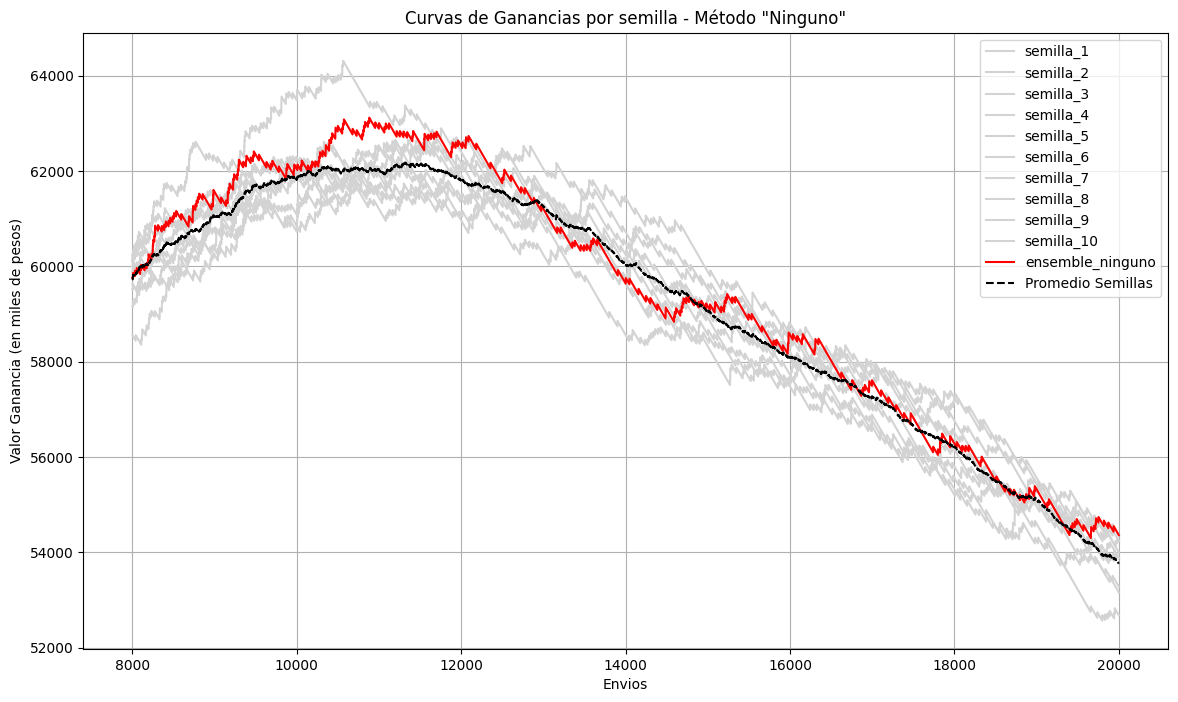

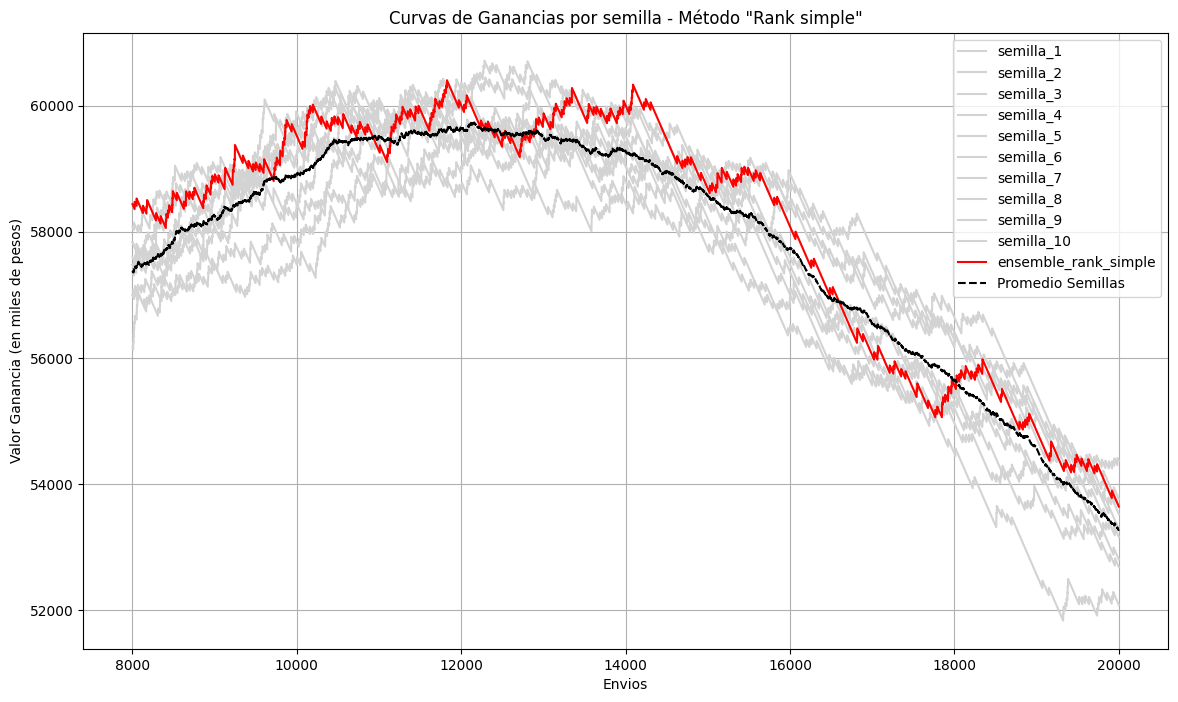

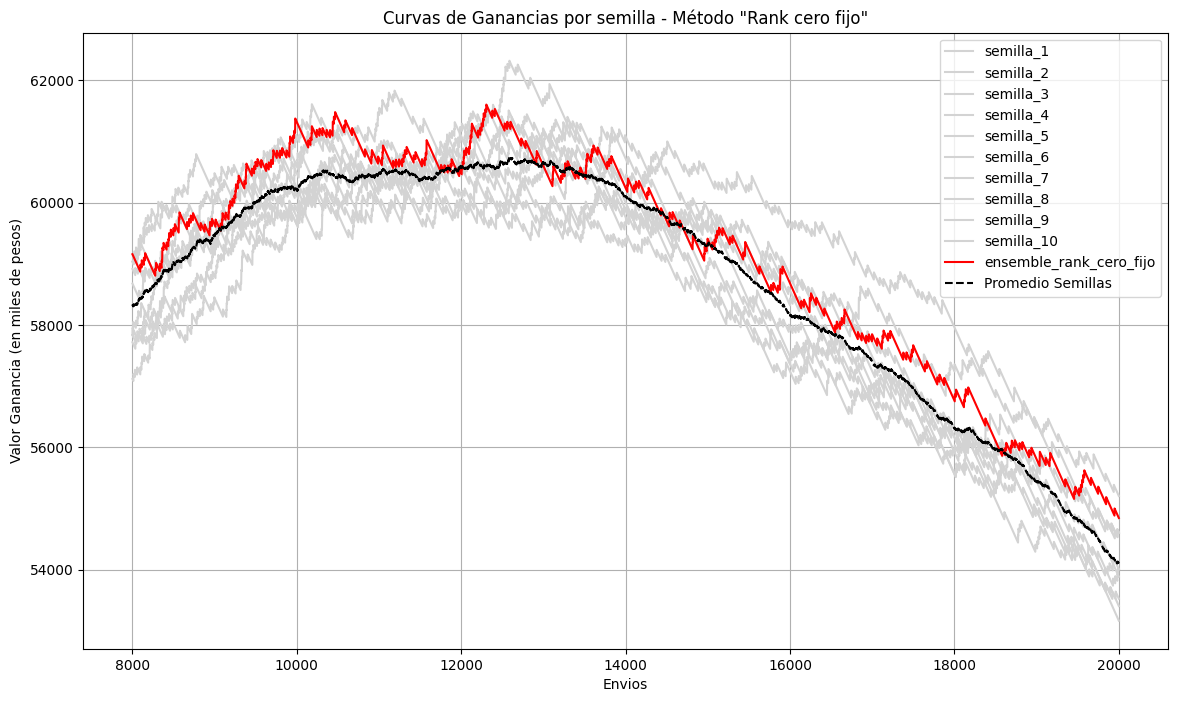

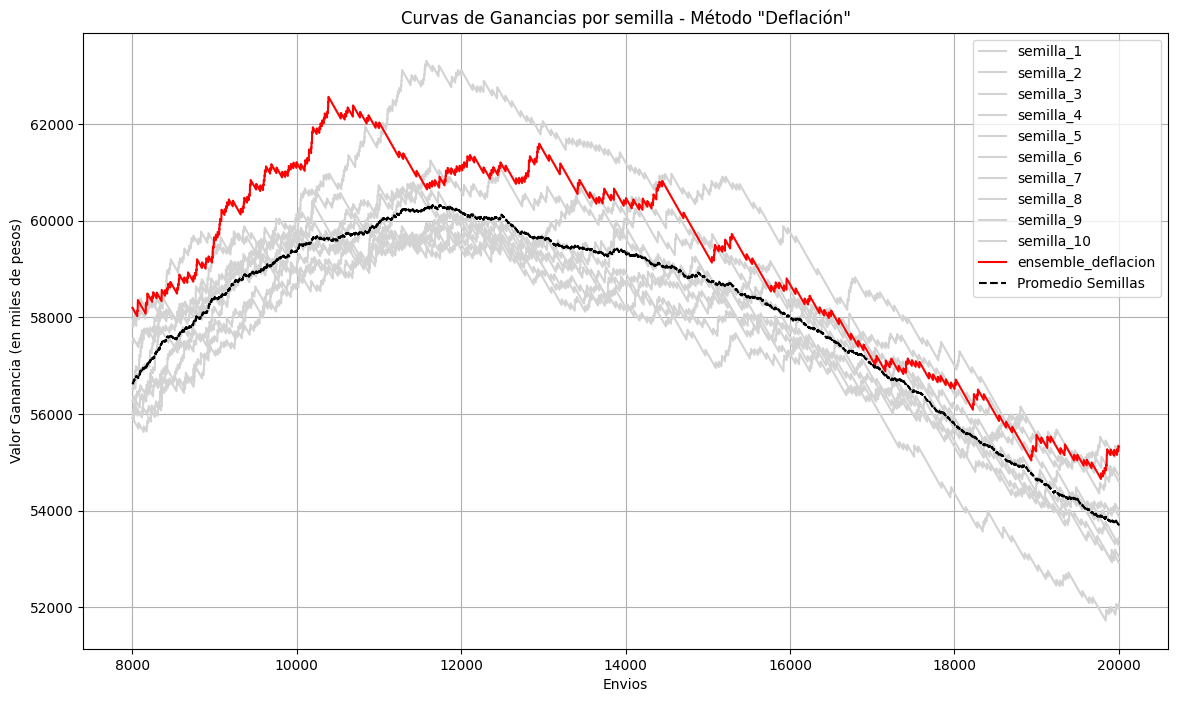

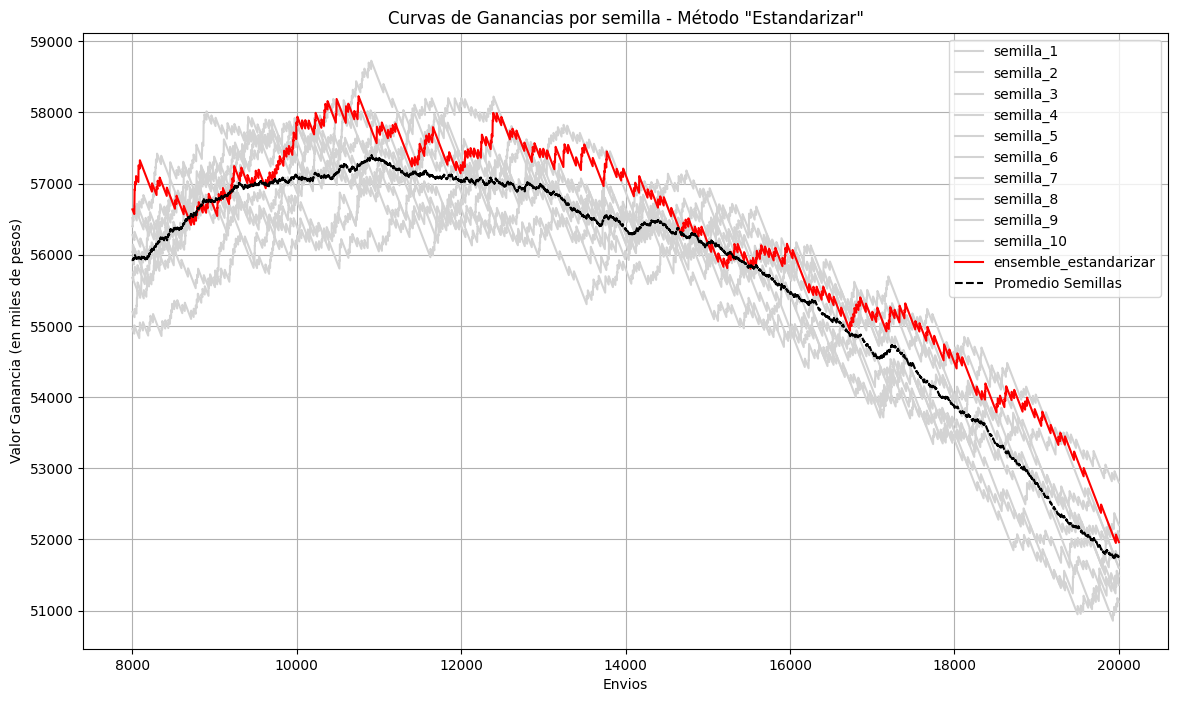

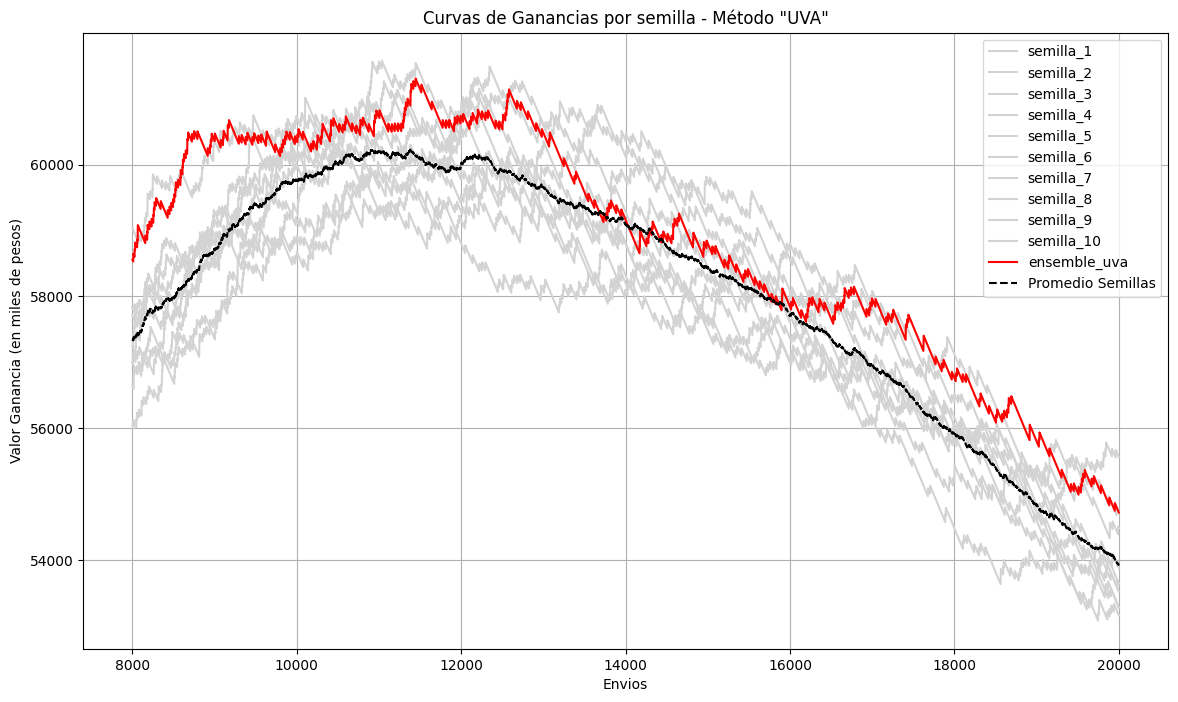

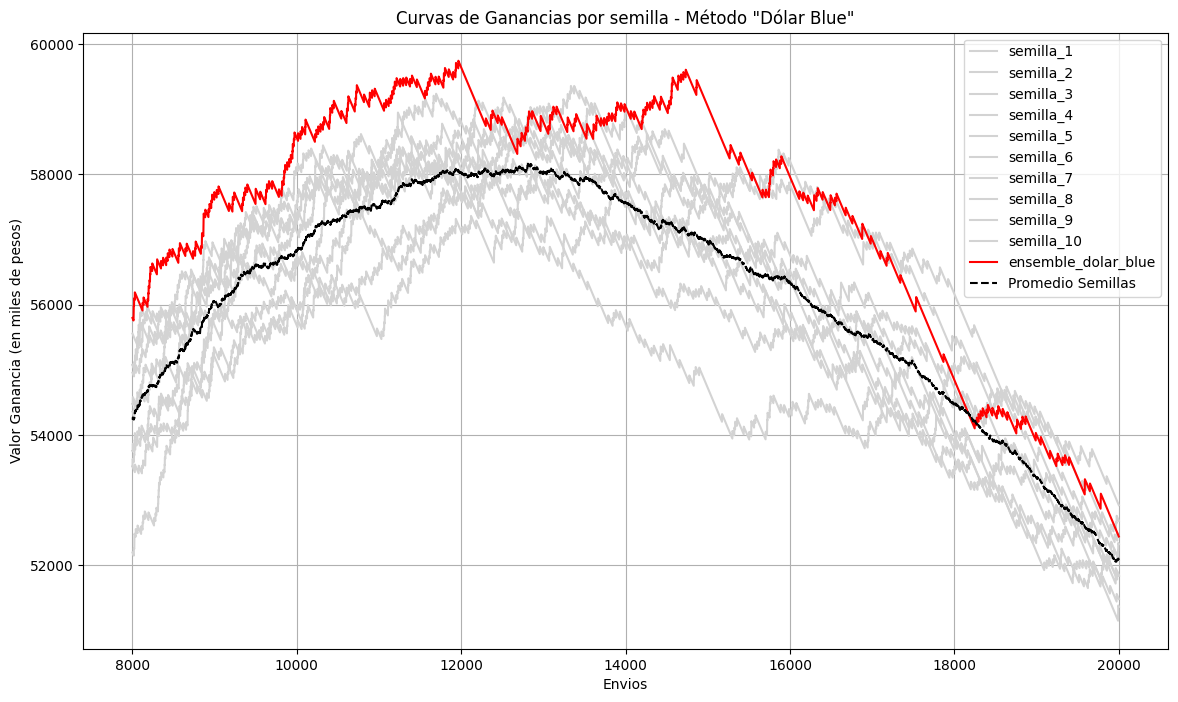

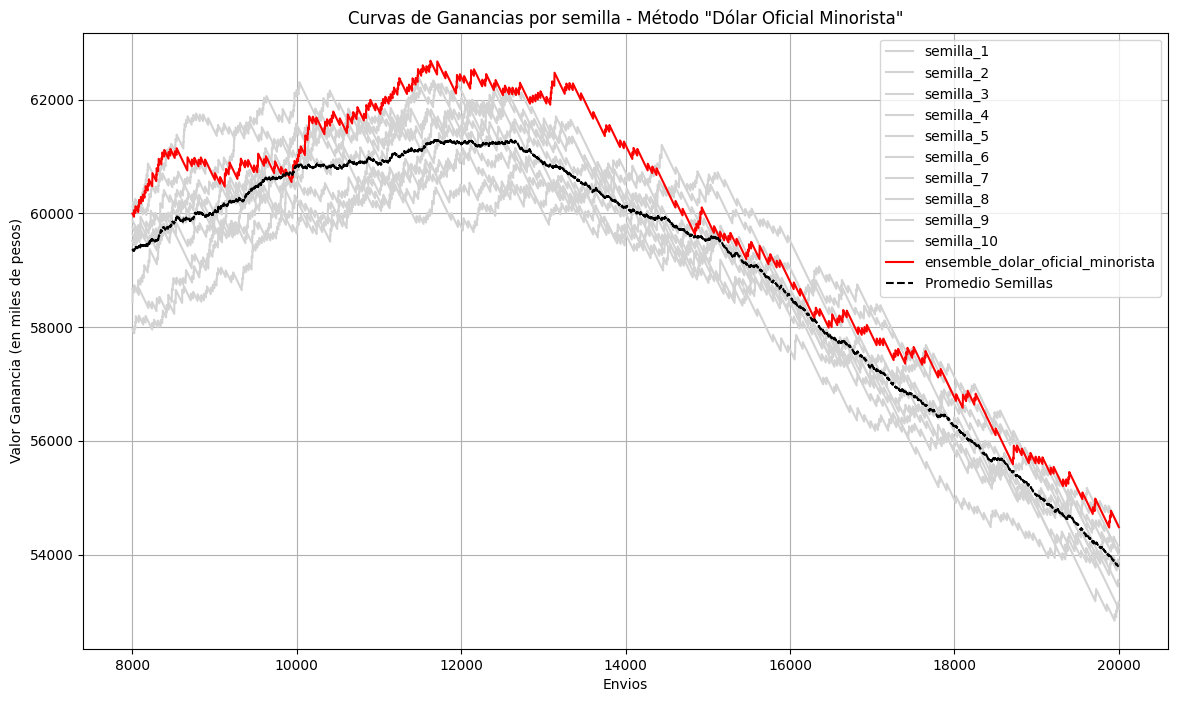

In [27]:
# Ganancias por semilla para cada uno de los métodos probados
for i in range(0,8):
    df = dfs[i]
    df = df[['envios', 'gan_sum_1', 'm_1_1', 'm_1_2', 'm_1_3', 'm_1_4', 'm_1_5',
            'm_1_6', 'm_1_7', 'm_1_8', 'm_1_9', 'm_1_10', 'gan_suavizada']]
    df = df[(df['envios']>8000) & (df['envios']<20000)]
    titulo = prefijos[i]

    # Selecciona las columnas que deseas graficar
    columnas_a_graficar = ['m_1_1', 'm_1_2', 'm_1_3', 'm_1_4', 'm_1_5', 'm_1_6', 'm_1_7', 'm_1_8', 'm_1_9', 'm_1_10']
    columnas_a_graficar_2 = ['semilla_1', 'semilla_2', 'semilla_3', 'semilla_4', 'semilla_5', 'semilla_6', 'semilla_7', 'semilla_8', 'semilla_9', 'semilla_10']

    # Configura el tamaño del gráfico
    plt.figure(figsize=(14, 8))

    # Grafica cada columna en gris claro
    for j, columna in enumerate(columnas_a_graficar):
        plt.plot(df['envios'], df[columna]/1000, label=columnas_a_graficar_2[j], color='lightgrey')
    plt.plot(df_ganancias_semillero_combinado['envios'], df_ganancias_semillero_combinado[columnas_semillero[i]]/1000, label=labels_semillero[i], color='red')

    # Calcula el promedio de los 10 valores por envío
    df['promedio'] = df[columnas_a_graficar].mean(axis=1)

    # Grafica la curva de promedio en negro
    plt.plot(df['envios'], df['promedio']/1000, label='Promedio Semillas', linestyle='--', color='black')

    # Agrega etiquetas y título
    plt.xlabel('Envios')
    plt.ylabel('Valor Ganancia (en miles de pesos)')
    plt.title(f'Curvas de Ganancias por semilla - Método "{titulo}"')
    plt.legend()
    plt.grid(True)

    # Muestra el gráfico
    plt.show()

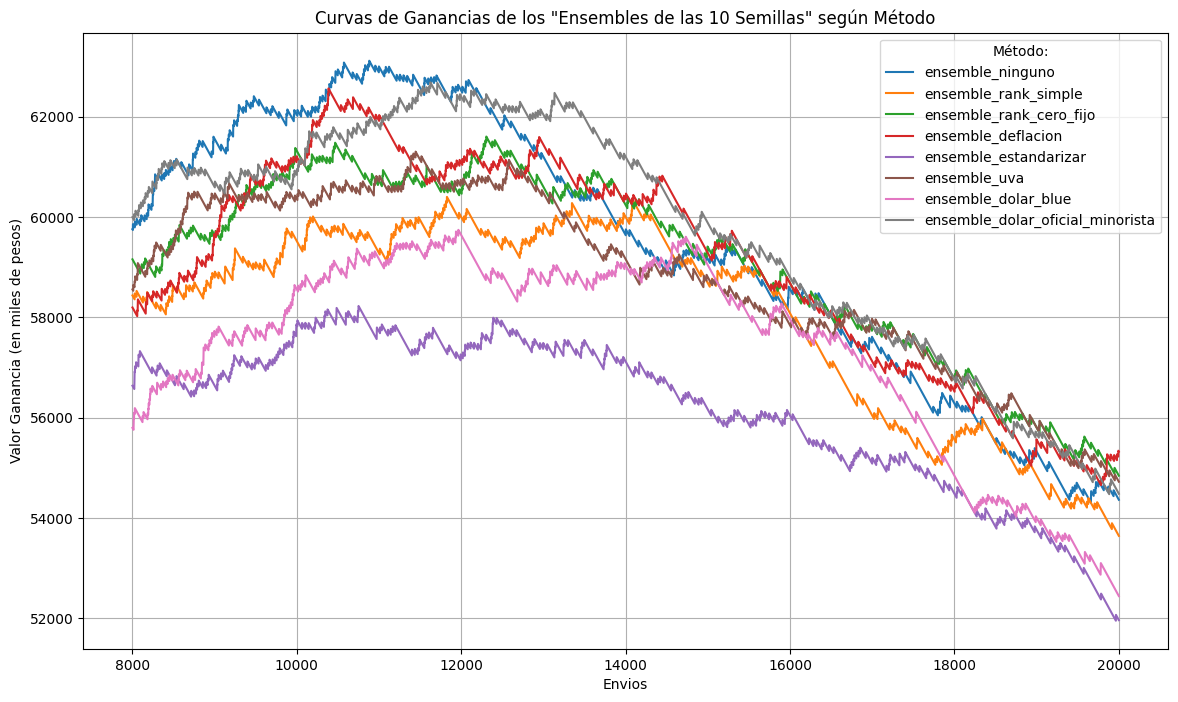

In [29]:
# Graficar los datos
plt.figure(figsize=(14, 8))
for i,column in enumerate(columnas_semillero):
    plt.plot(df_ganancias_semillero_combinado['envios'], df_ganancias_semillero_combinado[column]/1000, label=labels_semillero[i])

plt.xlabel('Envios')
plt.ylabel('Valor Ganancia (en miles de pesos)')
plt.title('Curvas de Ganancias de los "Ensembles de las 10 Semillas" según Método')
plt.legend(title="Método:")
plt.grid(True)
plt.show()